## Quadratic Probing

Table Size: 4001. c1, c2 = 1, 1 limit exceeded 803 times, 20.075000000000003%
Table Size: 4003. c1, c2 = 1, 1 limit exceeded 784 times, 19.6%
Table Size: 4007. c1, c2 = 1, 1 limit exceeded 796 times, 19.900000000000002%
Table Size: 4013. c1, c2 = 1, 1 limit exceeded 776 times, 19.400000000000002%
Table Size: 4019. c1, c2 = 1, 1 limit exceeded 781 times, 19.525000000000002%
Table Size: 4073. c1, c2 = 1, 1 limit exceeded 796 times, 19.900000000000002%
Table Size: 4591. c1, c2 = 1, 1 limit exceeded 742 times, 18.55%
Table Size: 5101. c1, c2 = 1, 1 limit exceeded 296 times, 7.3999999999999995%
Table Size: 6907. c1, c2 = 1, 1 limit exceeded 102 times, 2.55%
Table Size: 7817. c1, c2 = 1, 1 limit exceeded 69 times, 1.725%
Table Size: 8713. c1, c2 = 1, 1 limit exceeded 39 times, 0.975%
Table Size: 9973. c1, c2 = 1, 1 limit exceeded 21 times, 0.525%

c1, c2 = 1, 1. Smallest acceptable table size is 4003

Table Size: 4001. c1, c2 = 2, 0.5 limit exceeded 835 times, 20.875%
Table Size: 4003. c1, c

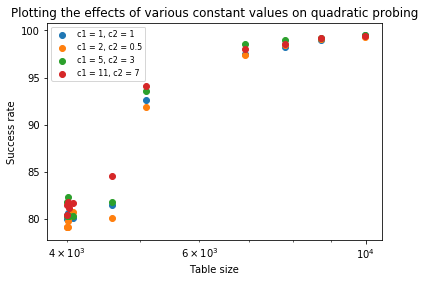

In [101]:
%matplotlib inline

'''
Kaelan Lupton
20036736
I confirm that this submission is my own work and is consistent with the
Queen's regulations on Academic Integrity. 

1. I hypothesize that double hashing will produce the required performance
standards with a smaller table size than quadratic probing. The latter,
while good at avoiding primary clustering, is occasionally prone to
secondary clustering. Due to this, I expect double hashing, with correctly
chosen tables sizes and hashing functions, will produce better results.

2. To translate a string to an integer value, I will sum the ASCII values
of each character in the string, then do modular division by m, the number
of spaces in the table, to ensure the number always falls in the table’s
range.

3. I based my experiments off the models used on code2begin.blogspot.com, linked here:

http://code2begin.blogspot.com/2017/01/hashing-with-quadratic-probing.html

This was the framework I used, editing it to fit my needs and to ensure I understood
what each piece of code was doing itself. I also implemented my own hash function. 

4. I based my experiments off the models used on code2begin.blogspot.com, linked here:

http://code2begin.blogspot.com/2017/02/double-hashing.html

This was the framework I used, editing it to fit my needs and to ensure I understood
what each piece of code was doing itself. I also implemented my own hash function. 

'''

import numpy as np
import matplotlib.pyplot as plt
  

class hashTable:
    '''
    Hash Table class for using quadratic probing.
    This class utilizes a hash function to place
    items from a list into a hash table.
    '''

    def __init__(self, x):        
        '''
        Initializes the class.
        
        self - the class itself.
        x - integer to indicate the size of the table.
        '''
        self.size = x
        self.table = list(0 for i in range(self.size))
        self.count = 0
        self.comparisons = 0
   
    # method that checks if the hash table is full or not
    def isFull(self):
        '''
        Checks if a table is already full.
        
        self - the class itself.
        '''
        if self.count == self.size:
            return True
        else:
            return False
   
    def hashFunction(self, element):
        '''
        Hash function used to determine position on hash table.
        This function sums the squared ASCII value modularly divided
        by 7 of each character in the given string.
        
        self - the class itself.
        element - the string to be hashed.
        '''
        total = 0
        for i in range(len(element)):
            total = total + ((ord(element[i])**2)*7)
        return total%self.size
       
   
    # method to resolve collision by quadratic probing method
    def quadraticProbing(self, element, position, c1, c2):
        '''
        This method words to resolve collisions with quadratic probing.
        
        self - the class itself.
        element - the string to be filed in the hash table.
        position - the current position.
        c1 - the first constant used in the quadratic probing formula.
        c2 - the second constant used in the quadratic probing formula.
        '''
        posFound = False
        exceed = False
        i = 1
        
        # begin looping to look for position
        while i <= self.size:
            # calculate new position by quadratic probing
            newPosition = int((position + ((c1 + c2 * i))*i) % self.size)
            # if the new position is empty, assign it
            if self.table[newPosition] == 0:
                posFound = True
                break
            else:
                # as the position is not empty increase i
                i += 1
                # checks to see if there has been an illegal number of steps
                if i >= 5:
                    exceed = True
        return posFound, newPosition, exceed
 
       
    def insert(self, element, c1, c2):
        '''
        Insert an element into a hash table.
        
        self - the class itself.
        element - the string to be inserted.
        c1 - the first constant used in the quadratic probing formula.
        c2 - the second constant used in the quadratic probing formula. 
        '''
        
        # check if the table is full
        if self.isFull():
            print("The table is full. Insert failed.")
            return False
        
        # for future use - used in evaluating success rate
        didExceed = False
        
        # for future use - whether or not an item was successfully stored
        isStored = False
       
        # get current position using the hash function
        position = self.hashFunction(element)
           
        # attempt insert if empty
        if self.table[position] == 0:
            self.table[position] = element
            isStored = True
            self.count += 1
       
        # if collision 
        else:
            isStored, position, exceed = self.quadraticProbing(element, position, c1, c2)
            if isStored:
                self.table[position] = element
                self.count += 1
                
                # checks the value returned from the quadratic probing function to see if
                # an illegal number of steps was taken
                if exceed:
                    didExceed = True
                    
        return isStored, didExceed   
    
        
def main():
    '''
    Main function of the program.
    '''
    
    # lists of data - constant values and table sizes to iterate through
    c1 = [1,2,5,11]
    c2 = [1, 0.5, 3, 7]
    tableSizes = [4001,4003,4007,4013,4019,4073,4591,5101,6907,7817,8713,9973]
    
    # these will hold the success rates of each constant value pair
    cq1 = []
    cq2 = []
    cq3 = []
    cq4 = []
    
    cqList = [cq1,cq2,cq3,cq4]
    
    # iterate through each constant value pair
    for j in range (0,4):
        
        bestSize = 100000000

        # iterate through each table size
        for k in range (len(tableSizes)):
            numberExceeded = 0
            table = hashTable(tableSizes[k])
            
            # read file and store contents
            with open('235.txt') as f:
                content = f.readlines()
                content = [x.strip() for x in content]

            randomSample = []
            
            # take sample from previously loaded file
            for i in range (0,4000):
                choice = np.random.choice(content)
                randomSample.append(choice)
                content.remove(choice)

            for i in range (0, len(randomSample)):
                test, num = table.insert(randomSample[i], c1[j], c2[j])
                if num:
                    numberExceeded += 1
            if numberExceeded < 800:
                if tableSizes[k] < bestSize:
                    bestSize = tableSizes[k]
                    
            print("Table Size: "+str(tableSizes[k])+". c1, c2 = " + str(c1[j]) + ", " + str(c2[j]) + " limit exceeded " + str(numberExceeded)+" times, "+str((numberExceeded/4000)*100)+"%")
            cqList[j].append(100-((numberExceeded/4000)*100))
            
        print("\nc1, c2 = " + str(c1[j]) + ", " + str(c2[j]) +". Smallest acceptable table size is " + str(bestSize)+"\n")
    
    # plotting the found data
    cq1Plot = plt.scatter(tableSizes,cq1)
    cq2Plot = plt.scatter(tableSizes,cq2)
    cq3Plot = plt.scatter(tableSizes,cq3)
    cq4Plot = plt.scatter(tableSizes,cq4)
    plt.xscale('log')
    plt.title('Plotting the effects of various constant values on quadratic probing')
    plt.xlabel('Table size')
    plt.ylabel('Success rate')
    plt.legend((cq1Plot, cq2Plot, cq3Plot, cq4Plot),
           ('c1 = 1, c2 = 1', 'c1 = 2, c2 = 0.5', 'c1 = 5, c2 = 3', 'c1 = 11, c2 = 7'),
           fontsize=8)
    plt.show()
main()


## Double Hashing

Table Size: 4001. Limit exceeded 497 times, 12.425%
Table Size: 4003. Limit exceeded 481 times, 12.025%
Table Size: 4007. Limit exceeded 475 times, 11.875%
Table Size: 4013. Limit exceeded 531 times, 13.275%
Table Size: 4019. Limit exceeded 526 times, 13.15%
Table Size: 4073. Limit exceeded 492 times, 12.3%
Table Size: 4591. Limit exceeded 339 times, 8.475000000000001%
Table Size: 5101. Limit exceeded 227 times, 5.675%
Table Size: 6907. Limit exceeded 52 times, 1.3%
Table Size: 7817. Limit exceeded 61 times, 1.525%
Table Size: 8713. Limit exceeded 35 times, 0.8750000000000001%
Table Size: 9973. Limit exceeded 26 times, 0.65%
Smallest acceptable table size is 4001

Table Size: 4001. Limit exceeded 205 times, 5.125%
Table Size: 4003. Limit exceeded 206 times, 5.1499999999999995%
Table Size: 4007. Limit exceeded 211 times, 5.2749999999999995%
Table Size: 4013. Limit exceeded 179 times, 4.475%
Table Size: 4019. Limit exceeded 183 times, 4.575%
Table Size: 4073. Limit exceeded 215 times, 5.

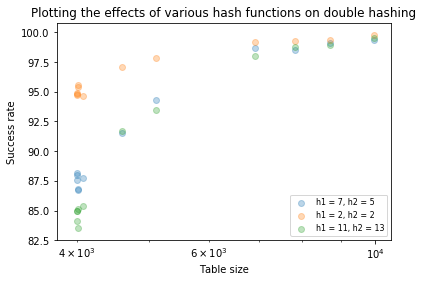

In [104]:
import numpy as np
import matplotlib.pyplot as plt

class doubleHashTable:
    '''
    Hash Table class for using double hashing.
    This class utilizes two hash functions to place
    items from a list into a hash table.
    '''
    
    def __init__(self, x):
        '''
        Initializes the class.
        
        self - the class itself.
        x - integer to indicate the size of the table.
        '''
        self.size = x
        self.table = list(0 for i in range(self.size))
        self.count = 0
        self.comparisons = 0
      
    
    def isFull(self):
        '''
        Checks if a table is already full.
        
        self - the class itself.
        '''
        if self.count == self.size:
            return True
        else:
            return False
   

    def h1(self, element, x):
        '''
        First hash function used to determine position on hash table.
        This function sums the squared ASCII value modularly divided
        by x of each character in the given string.
        
        self - the class itself.
        element - the string to be hashed.
        x - integer to modularly divide by to change hash function.
        '''        
        total = 0
        for i in range(len(element)):
            total = total + ((ord(element[i])**2)*x)
        return total%self.size
       
        
    def h2(self, element, x):
        '''
        Second hash function used to determine position on hash table.
        This function sums the ASCII values of each character and squares
        the total, then modularly divides that number by x.
        
        self - the class itself.
        element - the string to be hashed.
        x - integer to modularly divide by to change hash function.
        '''
        total = 0
        for i in range(len(element)):
            total = total + ord(element[i])
        return total**2 % x
           
    def doubleHashing(self, element, position, a, b):
        '''
        This method words to resolve collisions with double hashing.
        
        self - the class itself.
        element - the string to be filed in the hash table.
        position - the current position.
        a - the constant subbed into the first hash function.
        b - the constant subbed into the second hash function.
        '''
        posFound = False
        exceed = False
        i = 1

        while i <= self.size:
            newPosition = (self.h1(element, a) + (i*self.h2(element, b))) % self.size
            if self.table[newPosition] == 0:
                posFound = True
                break
            else:
                i += 1
                if i >= 5:
                    exceed = True
        return posFound, newPosition, exceed
 
       
    def insert(self, element, a, b):
        '''
        Insert an element into a hash table.
        
        self - the class itself.
        element - the string to be inserted.
        a - the constant subbed into the first hash function.
        b - the constant subbed into the second hash function. 
        '''
        
        if self.isFull():
            print("Hash Table Full")
            return False
           
        didExceed = False
        
        isStored = False
       
        position = self.h1(element, a)
           
        if self.table[position] == 0:
            self.table[position] = element
            isStored = True
            self.count += 1
       
        else:
            isStored, position, exceed = self.doubleHashing(element, position, a, b)
            if isStored:
                self.table[position] = element
                self.count += 1
                if exceed:
                    didExceed = True
 
        return isStored, didExceed
    
        
def main():
    '''
    Main function of the program.
    '''
    
    # lists for holding data to iterate through
    h1Options = [7,2,11]
    h2Options = [5,2,13]
    tableSizes = [4001,4003,4007,4013,4019,4073,4591,5101,6907,7817,8713,9973]
    
    # will hold success rates of each hash function pair
    h1List = []
    h2List = []
    h3List = []
    
    hList = [h1List, h2List, h3List]
    
    # iterate throughe each hash function pair
    for j in range (0,3):
        
        bestSize = 100000000

        # iterate through each table size
        for k in range (len(tableSizes)):
            numberExceeded = 0
            table = doubleHashTable(tableSizes[k])

            # read file, assign to list
            with open('235.txt') as f:
                content = f.readlines()
                content = [x.strip() for x in content]

            randomSample = []

            # take random sample of 4000 strings from file list
            for i in range (0,4000):
                choice = np.random.choice(content)
                randomSample.append(choice)
                content.remove(choice)

            for i in range (0, len(randomSample)):
                test, num = table.insert(randomSample[i], h1Options[j], h2Options[j])
                if num:
                    numberExceeded += 1
            if numberExceeded < 800:
                if tableSizes[k] < bestSize:
                    bestSize = tableSizes[k]
                    
            print("Table Size: "+str(tableSizes[k])+". Limit exceeded " + str(numberExceeded)+" times, "+str((numberExceeded/4000)*100)+"%")
            hList[j].append(100-((numberExceeded/4000)*100))
            
        print("Smallest acceptable table size is " + str(bestSize)+"\n")

    # plotting the found data
    h1Plot = plt.scatter(tableSizes,h1List, alpha=0.3)
    h2Plot = plt.scatter(tableSizes,h2List, alpha=0.3)
    h3Plot = plt.scatter(tableSizes,h3List, alpha=0.3)
    plt.xscale('log')
    plt.title('Plotting the effects of various hash functions on double hashing')
    plt.xlabel('Table size')
    plt.ylabel('Success rate')
    plt.legend((h1Plot, h2Plot, h3Plot),
           ('h1 = 7, h2 = 5', 'h1 = 2, h2 = 2', 'h1 = 11, h2 = 13'),
           fontsize=8)
    plt.show()        
        
main()

